[1] 5

[1] 2
[1]  0.9416638 -1.9097187  3.1765717 -2.9830858  1.4256598
[1] -19.05834 -31.90972 -36.82343 -52.98309 -58.57434
[1] -19.05834 -31.90972 -36.82343 -52.98309 -58.57434
  group value predicted
1  trt1   -20 -19.05834
2  trt2   -30 -31.90972
3  trt3   -40 -36.82343
4  trt4   -50 -52.98309
5  trt5   -60 -58.57434
   group   context     value
1   trt1     value -20.00000
2   trt2     value -30.00000
3   trt3     value -40.00000
4   trt4     value -50.00000
5   trt5     value -60.00000
6   trt1 predicted -19.05834
7   trt2 predicted -31.90972
8   trt3 predicted -36.82343
9   trt4 predicted -52.98309
10  trt5 predicted -58.57434
[1] 4
[1] -9.2267276  0.6335133 -5.1324847  5.2233941 -4.3135760
[1] -29.22673 -29.36649 -45.13248 -44.77661 -64.31358
[1] -29.22673 -29.36649 -45.13248 -44.77661 -64.31358
  group value predicted
1  trt1   -20 -29.22673
2  trt2   -30 -29.36649
3  trt3   -40 -45.13248
4  trt4   -50 -44.77661
5  trt5   -60 -64.31358
   group   context     value
1   trt1     value

geom_point: na.rm = FALSE
stat_identity: na.rm = FALSE
position_identity 

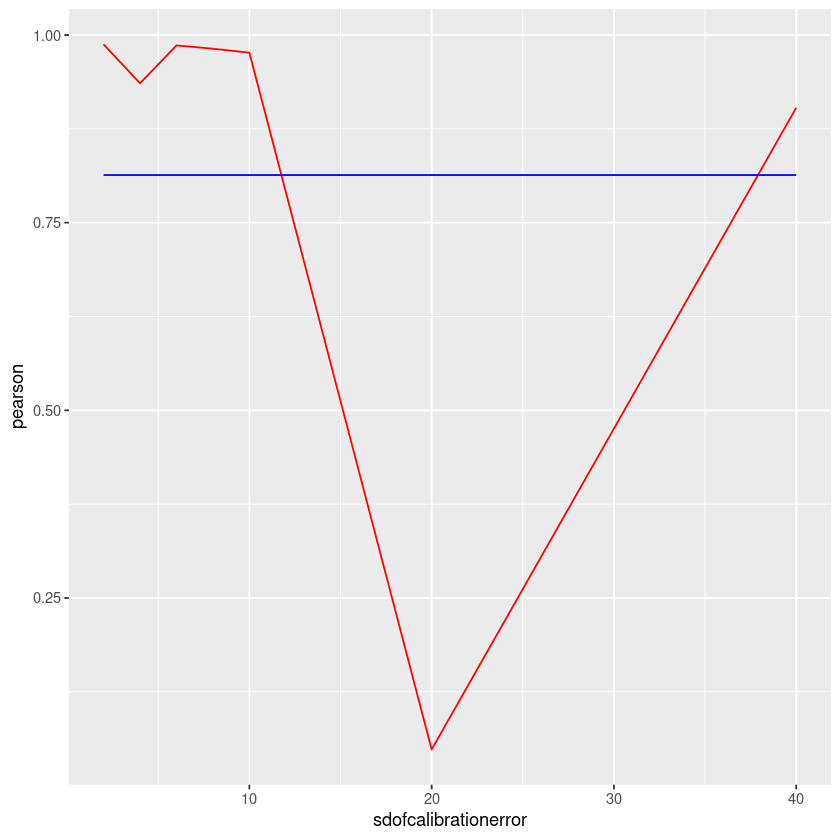

In [1]:
# install.packages("ggplot2")
library(ggplot2)

columns = c("sdofcalibrationerror","pearson","spearman","pearsonrandom95","spearmanrandom95")
length(columns)
result = data.frame(matrix(nrow = 0, ncol = length(columns))) 
colnames(result) = columns
group <- c("trt1", "trt2", "trt3","trt4","trt5")

value <- c(-20,-30,-40,-50,-60)

for (sd in c(2,4,6,8,10,20,40))
{
print(sd)

errormodel <- rnorm(5, 0, sd)
print(errormodel)
print(value+errormodel)
predicted <- value+errormodel
print(predicted)
df1 <- data.frame(group,value,predicted)
print(df1)
library(tidyr)
data_long <- gather(df1, context, value, value,predicted, factor_key=TRUE)
print(data_long)
ggplot(data=data_long, aes(x=group, y=value)) +
  geom_bar(aes(fill=context), stat="identity", 
             position="dodge") 


spear <- cor.test(x=df1$value, y=df1$predicted, method = 'spearman')
pear <- cor.test(x=df1$value, y=df1$predicted, method = 'pearson')
spear <- spear$estimate
pear <- pear$estimate
spearman_random=c()
pearson_random=c()

for (val in 1:1000)
{
testspear=cor.test(x=df1$value, y=sample(df1$predicted), method = 'spearman')
testpear=cor.test(x=df1$value, y=sample(df1$predicted), method = 'pearson')
spearman_random=append(spearman_random,testspear$estimate)
pearson_random=append(pearson_random,testpear$estimate)    
}
quan95spear=quantile(spearman_random,0.95)
quan95person=quantile(pearson_random,0.95)
    
resultline=data.frame(sd,pear,spear,quan95person,quan95spear)
colnames(resultline) = columns
result<-rbind(result,as.data.frame(resultline))    
}    
print(result)

ggplot(data=result, aes(x=sdofcalibrationerror)) +
  geom_line(aes(y=pearson),color="red") +
  geom_line(aes(y=quan95person),color="blue") 
  geom_point()


[1]  6.27720  7.52380  0.41000 -6.73000  3.63000  1.79000 -5.67000 -9.40310
[9] 11.16889


NULL

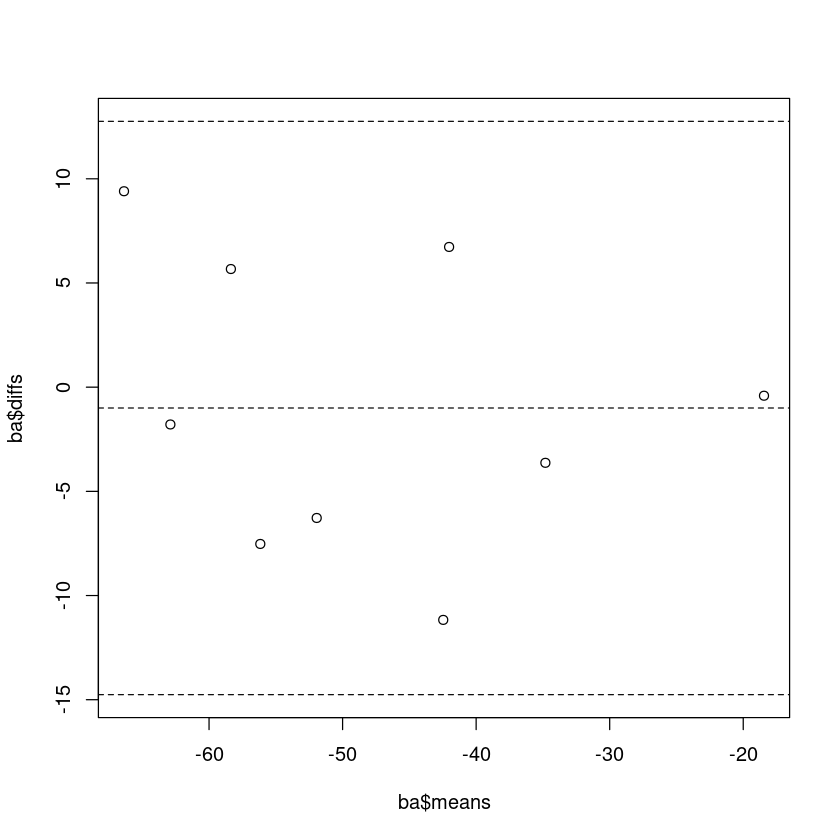

In [151]:
name=c("Crouse", "Hougard-1", "Kasoglu2004-1", "Kosoglu2004-2", "LaRosa-1", "Hougaard-1", "Kosoglu2004-3", "Orion2023-1", "Orion2023-2")
model=c(-55.0772,
-59.9238,
-18.65,
-38.66,
-36.63,
-63.79,
-55.53,
-61.6669,
-48.04889
)
data=c(
-48.8,
-52.4,
-18.24,
-45.39,
-33,
-62,
-61.2,
-71.07,
-36.88
)
print
error=data-model
print(error)
#install.packages("BlandAltmanLeh")
library(BlandAltmanLeh)
library(ggplot2)
bland.altman.plot(model, data)
help(bland.altman.plot)

In [204]:
# install.packages("ggplot2")
#install.packages("Metrics")
library(ggplot2)
library(Metrics)


#Define target data vector 
studyarm=c("Crouse", "Hougard-1", "Kasoglu2004-1", "Kosoglu2004-2", "LaRosa-1", "Hougaard-1", "Kosoglu2004-3", "Orion2023-1", "Orion2023-2")
model=as.numeric(c(-55.0772,
-59.9238,
-18.65,
-38.66,
-36.63,
-63.79,
-55.53,
-61.6669,
-48.04889
))

#Define model output vector inputting definition of study arm vector 
value=as.numeric(c(
-48.8,
-52.4,
-18.24,
-45.39,
-33,
-62,
-61.2,
-71.07,
-36.88
))

#Calculate mean between-arm differences. A more conservative alternative would be 
studyarmsstats<-(outer(value,value, `-`))
studyarmsstats2<-mean(abs(studyarmsstats[upper.tri(studyarmsstats)]))
print(paste("Mean abs. between-arm difference:\n", studyarmsstats2))

#Data management for plotting
df0 <- data.frame(studyarm,value,model)
print(df0)
library(tidyr)
data_long0 <- gather(df0, context, value, value,model, factor_key=TRUE)
print(data_long0)

#Bar plot of model vs per arm change of LDLc + LPAc
p1 <- ggplot(data=data_long0, aes(x=studyarm, y=value)) +
  geom_bar(aes(fill=context), stat="identity", 
             position="dodge") +
  geom_text(x=4, y=-70, size=4,  label=(paste("Mean abs. between-arm difference:\n", format(studyarmsstats2,digits=2)))) +
  theme(axis.text.x=element_text(angle = -90, hjust = 0,size = 10 )) 
ggsave(
  "Figure1_barplot.png", 
  p1, 
  device = png, 
  width = 15, height = 12, units = "cm", res = 300
)  
  


# Scatter plot model vs. data with identity and correlation, error metric  
p2 <- ggplot(df0, aes(x=model, y=value)) + geom_point() + geom_abline() + geom_abline(intercept=20) + geom_abline(intercept=-20) +   
  geom_text(x=-40, y=-60, size=6,  label=(paste("Pearson correlation coeff:\n", format(cor.test(x=model, y=value, method = 'pearson')$estimate,digits=3)))) + 
  geom_text(x=-40, y=-70, size=6,  label=(paste("RMSD:\n", format(rmse(model,value),digits=3))))   +
  xlim(-80,-10) +
  ylim(-80,-10) +
  theme(axis.text=element_text(size=20), axis.title=element_text(size=20,face="bold"))

ggsave(
  "Figure2_scatterplot.png", 
  p2, 
  device = png, 
  width = 18, height = 14, units = "cm", res = 300
)            
            
library(blandr)
# Blandr Bland - Altman analysis of the calibration vs. data points 
p3 <- blandr.draw(model,value ) + 
 labs(title="Bland-Altman analysis of\nmodel calibration vs. data", x ="Means ", y = "Differences")+
 blandr.output.text(model,value,sig.level=0.95)

ggsave(
  "Figure3_BlandAltman1.png", 
  p3, 
  device = png, 
  width = 13, height = 11, units = "cm", res = 300
)



[1] "Mean abs. between-arm difference:\n 19.665"
       studyarm  value     model
1        Crouse -48.80 -55.07720
2     Hougard-1 -52.40 -59.92380
3 Kasoglu2004-1 -18.24 -18.65000
4 Kosoglu2004-2 -45.39 -38.66000
5      LaRosa-1 -33.00 -36.63000
6    Hougaard-1 -62.00 -63.79000
7 Kosoglu2004-3 -61.20 -55.53000
8   Orion2023-1 -71.07 -61.66690
9   Orion2023-2 -36.88 -48.04889
        studyarm context     value
1         Crouse   value -48.80000
2      Hougard-1   value -52.40000
3  Kasoglu2004-1   value -18.24000
4  Kosoglu2004-2   value -45.39000
5       LaRosa-1   value -33.00000
6     Hougaard-1   value -62.00000
7  Kosoglu2004-3   value -61.20000
8    Orion2023-1   value -71.07000
9    Orion2023-2   value -36.88000
10        Crouse   model -55.07720
11     Hougard-1   model -59.92380
12 Kasoglu2004-1   model -18.65000
13 Kosoglu2004-2   model -38.66000
14      LaRosa-1   model -36.63000
15    Hougaard-1   model -63.79000
16 Kosoglu2004-3   model -55.53000
17   Orion2023-1   model -

Warning message:
“Use of `plot.data$x.axis` is discouraged.
ℹ Use `x.axis` instead.”
Warning message:
“Use of `plot.data$y.axis` is discouraged.
ℹ Use `y.axis` instead.”


In [210]:
columns = c("SDcalibrationerror","pearson","spearman","pearsonrandom95","spearmanrandom95")
length(columns)
result = data.frame(matrix(nrow = 0, ncol = length(columns))) 
colnames(result) = columns

for (sd in c(2,4,8,16,32,64)) # assume model error being distributed with these SDs
{
print(sd)

errormodel <- rnorm(length(value), 0, sd)
print(errormodel)
print(value+errormodel)
predicted <- value+errormodel # construct dummy simulation data 
print(predicted)
df1 <- data.frame(studyarm,value,predicted)
print(df1)
library(tidyr)
data_long <- gather(df1, context, value, value,predicted, factor_key=TRUE)
print(data_long)
    
# calculate simulated - data correlation coefficients 
spear <- cor.test(x=df1$value, y=df1$predicted, method = 'spearman')
pear <- cor.test(x=df1$value, y=df1$predicted, method = 'pearson')
spear <- spear$estimate
pear <- pear$estimate
spearman_random=c()
pearson_random=c()

for (val in 1:1000) # do random model (data permutation) sampling
 {
#print(val)
# gather random model correlation cowefficients with data      
testspear=cor.test(x=df1$value, y=sample(df1$predicted), method = 'spearman')
testpear=cor.test(x=df1$value, y=sample(df1$predicted), method = 'pearson')
spearman_random=append(spearman_random,testspear$estimate)
pearson_random=append(pearson_random,testpear$estimate)    
}
quan95spear=quantile(spearman_random,0.95)
quan95person=quantile(pearson_random,0.95)
    
resultline=data.frame(sd,pear,spear,quan95person,quan95spear)
colnames(resultline) = columns
result<-rbind(result,as.data.frame(resultline))    
}    
#print(result)
# plot random model 95 percentile,  real model (single value) and continous random error model for different SDs  
mypearson=cor.test(x=model, y=value, method = 'pearson')
print(mypearson)
p7<-ggplot(data=result, aes(x=SDcalibrationerror)) +
  geom_line(aes(y=pearson),color="red") +
  geom_line(aes(y=quan95person),color="blue") +
  geom_text(x=20, y=0.7, size=3,  , col="blue", label=(paste("Randompermutation-versus-data\n95 percentile of Pearson correlation coeffs:\n", format(quan95person[1],digits=3)))) +
  geom_hline(yintercept=mypearson$estimate) + 
  geom_text(x=20, y=0.8, size=3,  , col="black", label=(paste("Model-versus-data\nPearson correlation coeff:\n", format(mypearson$estimate,digits=3)))) +
  geom_text(x=20, y=0.9, size=3,  , col="red", label="Data + random error with SD=x\n versus data Pearson correlation coeff")

ggsave(
  "Figure_Pearson.png", 
  p7, 
  device = png, 
  width = 13, height = 11, units = "cm", res = 300
)

  
  

[1] 5

[1] 2
[1] -1.9978936  0.8406839  4.4227179  0.1186533 -1.6464491  1.3389330  2.0239320
[8]  1.0990557 -1.4689471
[1] -50.79789 -51.55932 -13.81728 -45.27135 -34.64645 -60.66107 -59.17607
[8] -69.97094 -38.34895
[1] -50.79789 -51.55932 -13.81728 -45.27135 -34.64645 -60.66107 -59.17607
[8] -69.97094 -38.34895
       studyarm  value predicted
1        Crouse -48.80 -50.79789
2     Hougard-1 -52.40 -51.55932
3 Kasoglu2004-1 -18.24 -13.81728
4 Kosoglu2004-2 -45.39 -45.27135
5      LaRosa-1 -33.00 -34.64645
6    Hougaard-1 -62.00 -60.66107
7 Kosoglu2004-3 -61.20 -59.17607
8   Orion2023-1 -71.07 -69.97094
9   Orion2023-2 -36.88 -38.34895
        studyarm   context     value
1         Crouse     value -48.80000
2      Hougard-1     value -52.40000
3  Kasoglu2004-1     value -18.24000
4  Kosoglu2004-2     value -45.39000
5       LaRosa-1     value -33.00000
6     Hougaard-1     value -62.00000
7  Kosoglu2004-3     value -61.20000
8    Orion2023-1     value -71.07000
9    Orion2023-2     value -


	Pearson's product-moment correlation

data:  model and value
t = 5.6041, df = 7, p-value = 0.0008125
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6012533 0.9799148
sample estimates:
     cor 
0.904288 



In [4]:
packageVersion("tidyr") 
#install.packages("tidyr")
library("tidyr")
library("ggplot2")
#install.packages("ggpubr")
install.packages("blandr")
library(blandr)

library(ggpubr)
theme_set(
  theme_pubr() +
    theme(legend.position = "right") + 
    theme(text = element_text(size = 20))  
  )

[1] ‘1.3.0’

Installing package into ‘/home/alex/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)



[1] -55.07720 -59.92380 -18.65000 -38.66000 -36.63000 -63.79000 -55.53000
[8] -61.66690 -48.04889
[1] -48.80 -52.40 -18.24 -45.39 -33.00 -62.00 -61.20 -71.07 -36.88


Warning message:
“Use of `plot.data$x.axis` is discouraged.
ℹ Use `x.axis` instead.”
Warning message:
“Use of `plot.data$y.axis` is discouraged.
ℹ Use `y.axis` instead.”


Number of comparisons:  9 
Maximum value for average measures:  -18.445 
Minimum value for average measures:  -66.36845 
Maximum value for difference in measures:  9.4031 
Minimum value for difference in measures:  -11.16889 

Bias:  -0.9996433 
Standard deviation of bias:  7.019353 

Standard error of bias:  2.339784 
Standard error for limits of agreement:  4.159832 

Bias:  -0.9996433 
Bias- upper 95% CI:  4.395909 
Bias- lower 95% CI:  -6.395196 

Upper limit of agreement:  12.75829 
Upper LOA- upper 95% CI:  22.35088 
Upper LOA- lower 95% CI:  3.1657 

Lower limit of agreement:  -14.75757 
Lower LOA- upper 95% CI:  -5.164986 
Lower LOA- lower 95% CI:  -24.35016 

Derived measures:  
Mean of differences/means:  3.042503 
Point estimate of bias as proportion of lowest average:  1.506203 
Point estimate of bias as proportion of highest average 5.41959 
Spread of data between lower and upper LoAs:  27.51586 
Bias as proportion of LoA spread:  -3.632971 

Bias: 
 -0.9996433  ( -6.39519

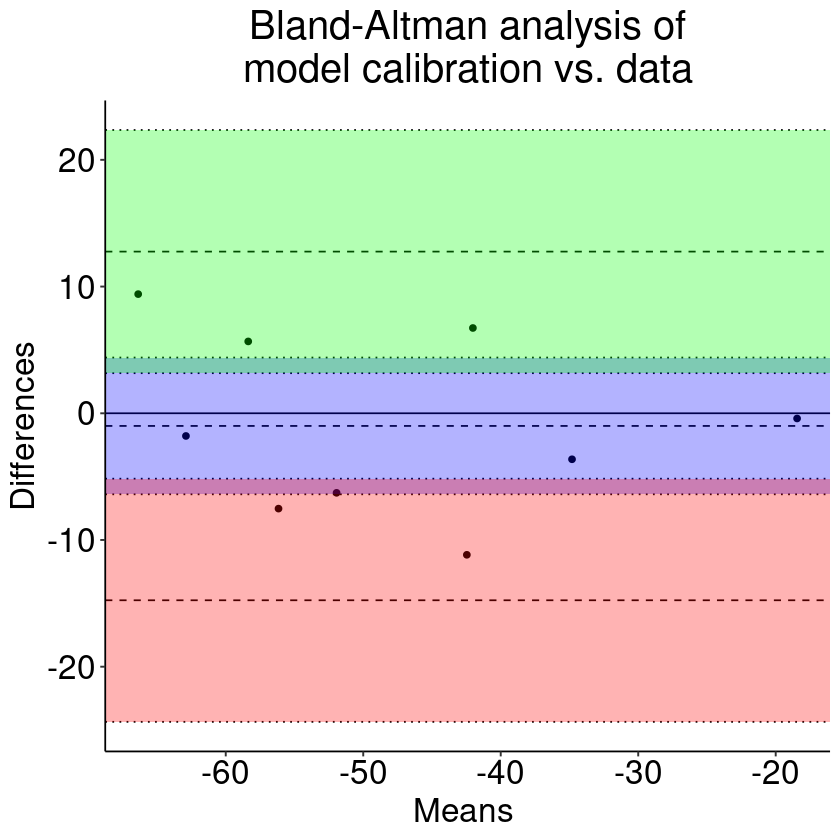

In [38]:
print(model)
print(value)
blandr.draw( model , value ) + 
 labs(title="Bland-Altman analysis of\nmodel calibration vs. data",
        x ="Means ", y = "Differences")
blandr.output.text ( model , value , sig.level=0.95 )

[1]        NaN -0.2649709  0.2580423  0.5168106
[1]       NaN 0.8093004 0.8137972 0.6612594


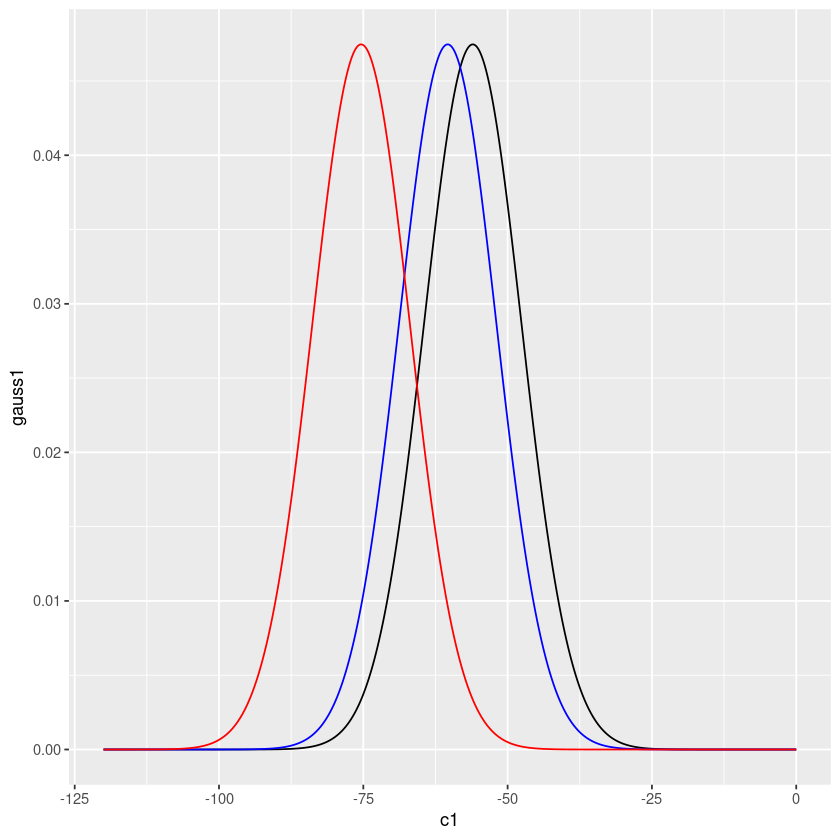

In [182]:
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4239976/ 
# NLMEM of LDL reduction by statins from EHRs 
# Cohen U1 10.2466/03.PR0.115c29z4

columns1 = c("time","mean","C5mean","C95mean","lower","C5lower","C95lower", "upper", "C5upper", "C95upper", "group")
time <- c(0, 150, 330, 540)
Orion10AVA40 <- c(0,-62.9,-58.13,-56.036) # data 
Orion10AVA40S <- c(0,-60.4,-60.38,-60.38) # model 
Orion10AVA40F <- c(0,-60.4-15,-60.38-15,-60.38-15) # "Falsified vector" 
estimatedSEMLU <- 1.96*0.05 # we hypothesize 5 % SE of population metrics due to sample size    
variab <- 1.96*0.15# we assume 15 % overall variability in measurements  

# data management for plotting
groups=c("data","model")
result = data.frame(matrix(nrow = 0, ncol = length(columns))) 
resultlines=data.frame(time,Orion10AVA40,Orion10AVA40-estimatedSEMLU*Orion10AVA40,Orion10AVA40+estimatedSEMLU*Orion10AVA40,Orion10AVA40-variab*Orion10AVA40,Orion10AVA40-(variab+estimatedSEMLU)*Orion10AVA40,Orion10AVA40-(variab-estimatedSEMLU)*Orion10AVA40,Orion10AVA40+variab*Orion10AVA40, Orion10AVA40+(variab-estimatedSEMLU)*Orion10AVA40,Orion10AVA40+(variab+estimatedSEMLU)*Orion10AVA40,"data")
names(resultlines)=columns1
resultlines2=data.frame(time,Orion10AVA40S,Orion10AVA40S-estimatedSEMLU*Orion10AVA40S,Orion10AVA40S+estimatedSEMLU*Orion10AVA40S,Orion10AVA40S-variab*Orion10AVA40S,Orion10AVA40S-(variab+estimatedSEMLU)*Orion10AVA40S,Orion10AVA40S-(variab-estimatedSEMLU)*Orion10AVA40S,Orion10AVA40S+variab*Orion10AVA40S, Orion10AVA40S+(variab-estimatedSEMLU)*Orion10AVA40S,Orion10AVA40S+(variab+estimatedSEMLU)*Orion10AVA40S,"model")
names(resultlines2)=columns1
resultlines3=data.frame(time,Orion10AVA40F,Orion10AVA40F-estimatedSEMLU*Orion10AVA40F,Orion10AVA40F+estimatedSEMLU*Orion10AVA40F,Orion10AVA40F-variab*Orion10AVA40F,Orion10AVA40F-(variab+estimatedSEMLU)*Orion10AVA40F,Orion10AVA40F-(variab-estimatedSEMLU)*Orion10AVA40F,Orion10AVA40F+variab*Orion10AVA40F, Orion10AVA40F+(variab-estimatedSEMLU)*Orion10AVA40F,Orion10AVA40F+(variab+estimatedSEMLU)*Orion10AVA40F,"falsified")
names(resultlines3)=columns1
# not needed : 
result=rbind(resultlines,resultlines2,resultlines3)


# Plot the VPC
p4<-ggplot(data=resultlines) +
 geom_line(aes(x=time, y=mean, col="A")) + 
 geom_line(aes(x=time, y=lower, col="B")) + 
 geom_line(aes(x=time, y=upper, col="C")) +
 geom_ribbon(aes(x=time , ymin=C5mean, ymax=C95mean), linetype=2, alpha=0.1, fill="Black") + 
 geom_ribbon(aes(x=time , ymin=C5lower, ymax=C95lower), linetype=2, alpha=0.1, fill="Green") + 
 geom_ribbon(aes(x=time , ymin=C5upper, ymax=C95upper), linetype=2, alpha=0.1,  fill="Red") +
 geom_point(data=resultlines2, aes(x=time, y=mean, col="D"))  +
 scale_color_manual(values=c('Black',"Green", "Red", "Blue")) +
 ylab("% LDL change")

ggsave(
  "Figure_LDLCprofile_CI_Tol_1p.png", 
  p4, 
  device = png, 
  width = 13, height = 11, units = "cm", res = 300
)
# 



#Cohen d calculation
dvec=((abs(Orion10AVA40S)-abs(Orion10AVA40))/(variab*(abs(Orion10AVA40))/1.96)) # Cohen d for comparison model vs data with dummy distrib per point 
dvecf=(Orion10AVA40F-Orion10AVA40)/(variab*(abs(Orion10AVA40)/1.96)) # Cohen d for the comparison with "falsified data"
print(dvec)
#install.packages("effectsize")
library(effectsize)
u1vec <- 1.0-(d_to_u1(dvec))
u1vecf <- 1.0-(d_to_u1(dvecf))
print(u1vec)
p5<-ggplot() +
 geom_ribbon(data=resultlines,  aes(x=time , ymin=C5mean, ymax=C95mean), linetype=2, alpha=0.1, fill="Black") +
 geom_ribbon(data=resultlines2, aes(x=time , ymin=C5mean, ymax=C95mean), linetype=2, alpha=0.1, fill="Blue") +
 geom_ribbon(data=resultlines3, aes(x=time , ymin=C5mean, ymax=C95mean), linetype=2, alpha=0.1, fill="Red") +

 geom_text(aes(x=time, y=c(-60,-60,-60,-60), label=format(u1vec, digits=2),size=4,color="A")) +
 geom_text(aes(x=time, y=c(-75,-75,-75,-75), label=format(u1vecf, digits=2),size=4, color="B")) +
 ylab("% LDL change")+
 scale_color_manual(values=c("Blue", 'Red'))
ggsave(
  "Figure_CohenOverlapAssessment.png", 
  p5, 
  device = png, 
  width = 13, height = 11, units = "cm", res = 300
)


c1=seq(-120,0,0.1)
gauss1=dnorm(c1,-56.036,(variab/1.96)*56.036)
gauss2=dnorm(c1,-60.38,(variab/1.96)*56.036)
gauss3=dnorm(c1,-60.38-15,(variab/1.96)*56.036)
test2=as.data.frame(cbind(c1,gauss1,gauss2))
ggplot(data=test2) + 
 geom_line(aes(x=c1, y=gauss1), col="Black") + 
 geom_line(aes(x=c1, y=gauss2), col="Blue") +
 geom_line(aes(x=c1, y=gauss3), col="Red") +
 geom_ribbon(data=test2, 
          aes(ymin=twox,ymax=x2), fill="blue", alpha=0.5) +
